In [1]:
# import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer

In [2]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Detecting Missing values

In [3]:
# Display non-null counts and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# count missings per variable
titanic.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [5]:
# percentages of missings per variable
(titanic.isna().sum() / titanic.isna().count()).sort_values(ascending=False) * 100

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

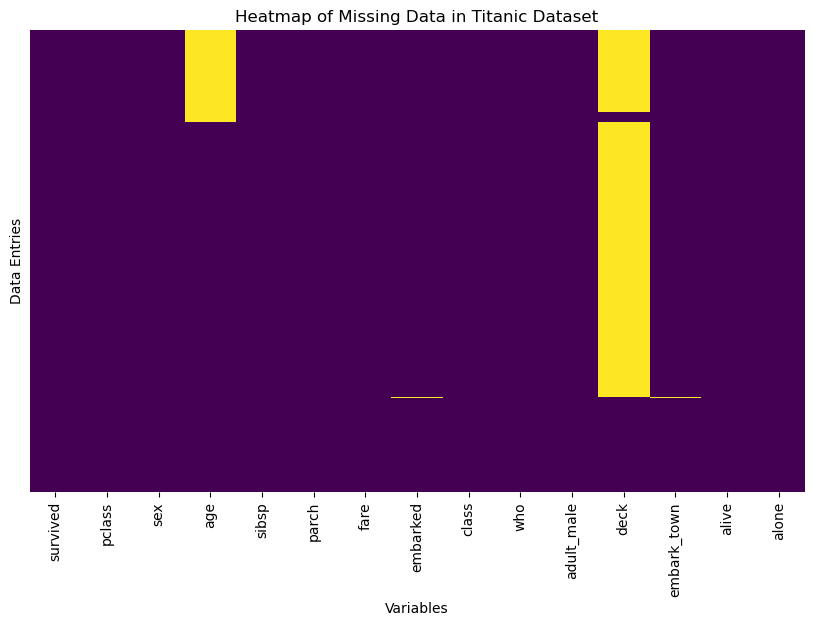

In [6]:
# Create a heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull().sort_values(['age', 'deck', 'embarked', 'embark_town'], ascending=False), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data in Titanic Dataset')
plt.xlabel('Variables')
plt.ylabel('Data Entries')
plt.show()

In [7]:
# count missings
ti_missing = titanic.isnull().sum()
# only for columns with at least 1 missing value
ti_missing = ti_missing[ti_missing > 0]

# columns of titanic with missings 
titanic.loc[:,ti_missing.index]

,age,embarked,deck,embark_town
0,22.0,S,NaN,Southampton
1,38.0,C,C,Cherbourg
2,26.0,S,NaN,Southampton
3,35.0,S,C,Southampton
4,35.0,S,NaN,Southampton
...,...,...,...,...
886,27.0,S,NaN,Southampton
887,19.0,S,B,Southampton
888,NaN,S,NaN,Southampton
889,26.0,C,C,Cherbourg


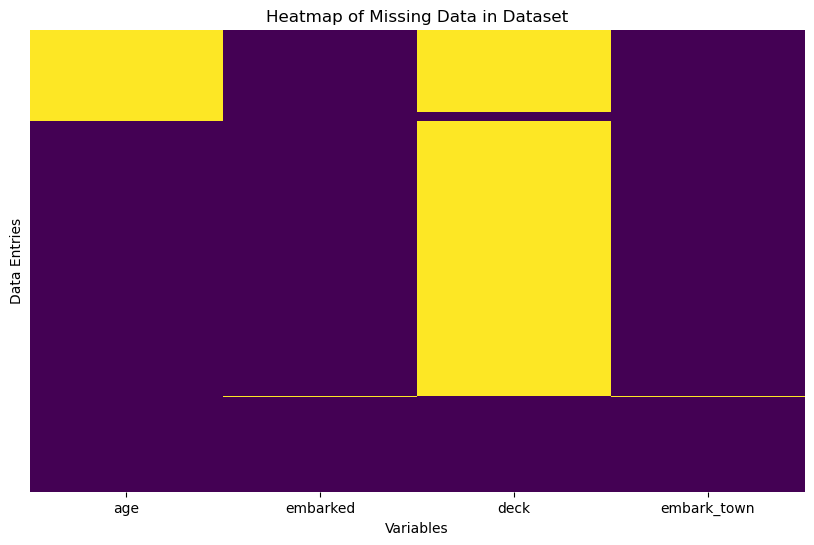

In [8]:
# Create a heatmap of missing data (only for columns with at least 1 missing value)
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.loc[:,ti_missing.index].isnull().sort_values(['age', 'deck', 'embarked', 'embark_town'], ascending=False), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data in Dataset')
plt.xlabel('Variables')
plt.ylabel('Data Entries')
plt.show()

# Simple example

In [9]:
# Creating a simple dataset
data = {
    'Age': [25, np.nan, 35, 40, 28, 33, np.nan, 30, 31, 29],
    'Salary': [50000, 54000, None, 62000, 58000, 60000, 52000, None, 55000, 53000],
    'Gender': ['Male', 'Female', 'Female', np.nan, 'Male', 'Male', 'Female', np.nan, 'Female', np.nan],
    'Experience': [np.nan, 5, 10, 8, 3, 7, None, 6, 9, 4]
}
df = pd.DataFrame(data)
df

,Age,Salary,Gender,Experience
0,25.0,50000.0,Male,NaN
1,NaN,54000.0,Female,5.0
2,35.0,NaN,Female,10.0
3,40.0,62000.0,NaN,8.0
4,28.0,58000.0,Male,3.0
5,33.0,60000.0,Male,7.0
6,NaN,52000.0,Female,NaN
7,30.0,NaN,NaN,6.0
8,31.0,55000.0,Female,9.0
9,29.0,53000.0,NaN,4.0


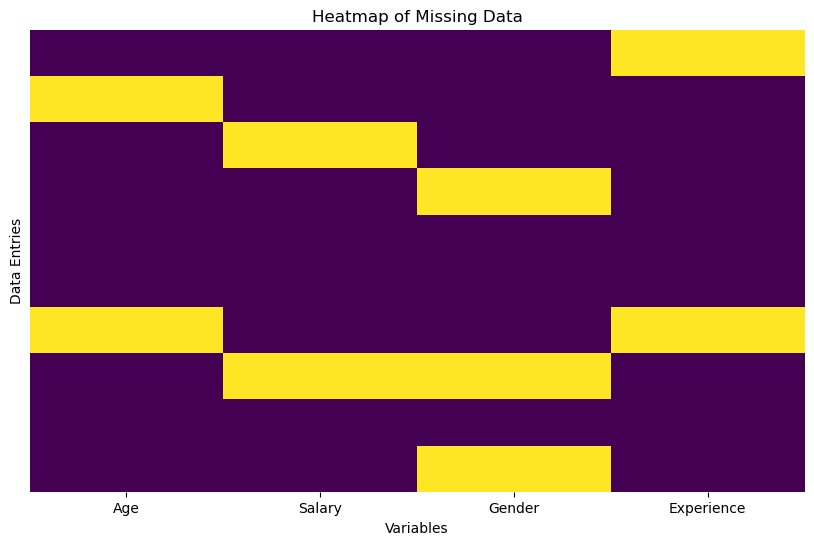

In [10]:
# Create a heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.xlabel('Variables')
plt.ylabel('Data Entries')
plt.show()